In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
# Display the data table for preview
lab_rats = pd.merge(mouse_metadata, study_results, on="Mouse ID",suffixes = ("Metadata", "Study"))
lab_rats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(lab_rats['Mouse ID'].value_counts())

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicate mouse ID values
#dupes = lab_rats.groupby(['Mouse ID'])
#dupes = dupes.drop_dupicates(subset='Timepoint', keep = False)
#dupes

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_IDs = lab_rats.drop_duplicates(subset='Mouse ID', keep=False)
mouse_IDs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_IDs)

12

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties 
#of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_data = lab_rats.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = tumor_data.mean()
tumor_median = tumor_data.median()
tumor_variance = tumor_data.var()
tumor_sd = tumor_data.std()
tumor_SEM = tumor_data.sem()
tumor_stats = pd.DataFrame({"Mean" : tumor_mean, "Median" : tumor_median,
                            "Variance" :tumor_variance,"Standard Deviation":tumor_sd,
                            "SEM" :tumor_SEM})
tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation = tumor_data.aggregate(['mean', 'median','var','std', 'sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a bar plot showing the total number of measurements taken on 
#each drug regimen using pandas.


In [ ]:
# Generate a bar plot showing the total number of measurements taken 
#on each drug regimen using pyplot.

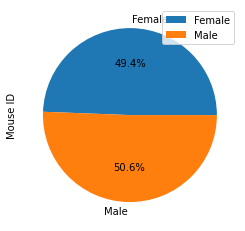

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
f_v_m = lab_rats.groupby('Sex').count()
f_v_m.plot(kind="pie", y ='Mouse ID', autopct='%1.1f%%')
plt.show()


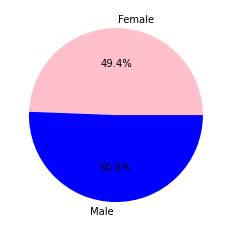

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(f_v_m['Mouse ID'], labels = ("Female", "Male"),colors = ('Pink', 'Blue'), autopct='%1.1f%%')
plt.show()

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = lab_rats.drop_duplicates(subset='Mouse ID', keep="last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = last_timepoint['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [79]:
# Locate the rows which contain mice on each drug and get the tumor volumes
multi_reg = lab_rats.groupby('Mouse ID')['Drug Regimen'].unique()
multi_reg

Mouse ID
a203    [Infubinol]
a251    [Infubinol]
a262      [Placebo]
a275     [Ceftamin]
a366     [Stelasyn]
           ...     
z435     [Propriva]
z578     [Ramicane]
z581    [Infubinol]
z795     [Naftisol]
z969     [Naftisol]
Name: Drug Regimen, Length: 249, dtype: object

In [80]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset     
box_data = last_timepoint.groupby('Drug Regimen')
box_plot = box_data['Tumor Volume (mm3)'].describe()
box_iqr = box_plot['75%'] - box_plot['25%']
box_plot['IQR'] = box_iqr
box_plot['Upper Bound'] = box_plot['25%'] - (1.5*box_plot['IQR'])
box_plot['Lower Bound'] = box_plot['75%'] + (1.5*box_plot['IQR'])
box_plot

,count,mean,std,min,25%,50%,75%,max,IQR,Upper Bound,Lower Bound
Drug Regimen,,,,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863,20.704562,51.832015
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752,25.355450,87.666458
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135,36.832905,82.741446
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014,13.152155,36.991862,89.600484
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817,17.484111,25.853344,95.789787
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939,15.191386,30.155822,90.921368
Propriva,25.0,56.736964,8.327605,45.000000,49.122969,55.841410,62.570880,72.455421,13.447911,28.951103,82.742746
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537,17.912664,54.306811
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690,16.627349,27.535572,94.044968


In [ ]:
# Determine outliers using upper and lower bounds
tumor_outliers = 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
